In [1]:
import pandas as pd
import spacy
import emoji
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Clakovi_videos.csv')
df = df[df['transcript'] != 'Subtitle not available']
df['transcript'] = df['transcript'].str.replace('\xa0__\xa0', 'xxxx')

In [3]:
# Load Spanish tokenizer, POS tagger, parser, NER and word vectors
nlp = spacy.load('es_core_news_sm')

def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize using SpaCy's Spanish model
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return tokens


In [4]:
# Apply preprocessing to each column
df['title'] = df['title'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['transcript'] = df['transcript'].apply(preprocess)

In [5]:
# Save the DataFrame as CSV
df.to_csv('preprocessed_data.csv', index=False)

In [6]:
# Title
# Word frequency analysis
title_tokens = [token for title in df['title'] for token in title]

# Count the occurrences of each token
word_freq = Counter(title_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('clakovi', 67), ('clarakongvilar', 14), ('haul', 13), ('vlog', 12), ('pregunta', 7), ('verano', 7), ('vlogma', 7), ('madrid', 6), ('amiga', 6), ('ropa', 6), ('brandy', 6), ('melville', 6), ('subdued', 6), ('qa', 5), ('respuesta', 5)]
              Word  Frequency
0          clakovi         67
1   clarakongvilar         14
2             haul         13
3             vlog         12
4         pregunta          7
5           verano          7
6           vlogma          7
7           madrid          6
8            amiga          6
9             ropa          6
10          brandy          6
11        melville          6
12         subdued          6
13              qa          5
14       respuesta          5


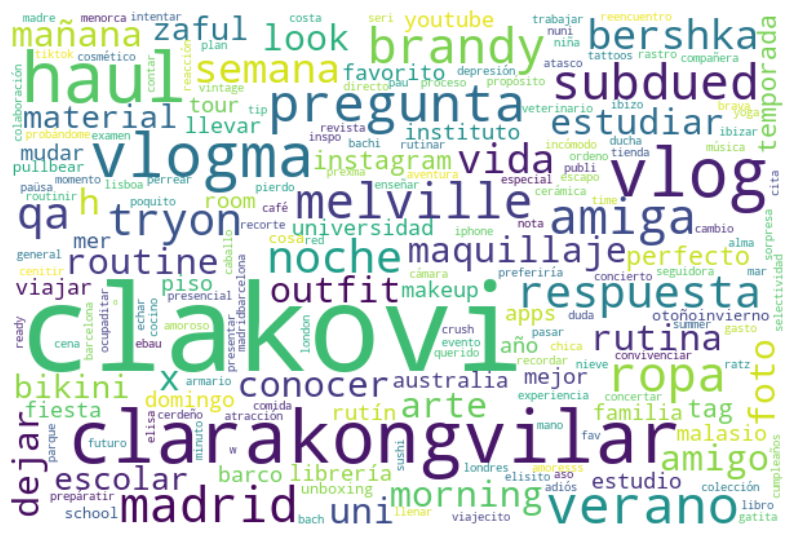

In [12]:

title_words = ' '.join([' '.join(doc) for doc in df['title']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(title_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("title_wordcloud.png")

plt.show()


In [8]:
# Description
# Word frequency analysis
description_tokens = [token for description in df['description'] for token in description]

# Count the occurrences of each token
word_freq = Counter(description_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('clakovi', 349), ('vídeo', 242), ('gracias', 135), ('instagram', 126), ('esperar', 80), ('gracia', 69), ('musically', 57), ('disfrutéis', 56), ('ver', 56), ('buttons', 56), ('quieroooooooo', 55), ('traer', 53), ('clarakongvilagmailcom', 49), ('peoople', 45), ('tiktok', 42)]
                     Word  Frequency
0                 clakovi        349
1                   vídeo        242
2                 gracias        135
3               instagram        126
4                 esperar         80
5                  gracia         69
6               musically         57
7              disfrutéis         56
8                     ver         56
9                 buttons         56
10          quieroooooooo         55
11                  traer         53
12  clarakongvilagmailcom         49
13                peoople         45
14                 tiktok         42


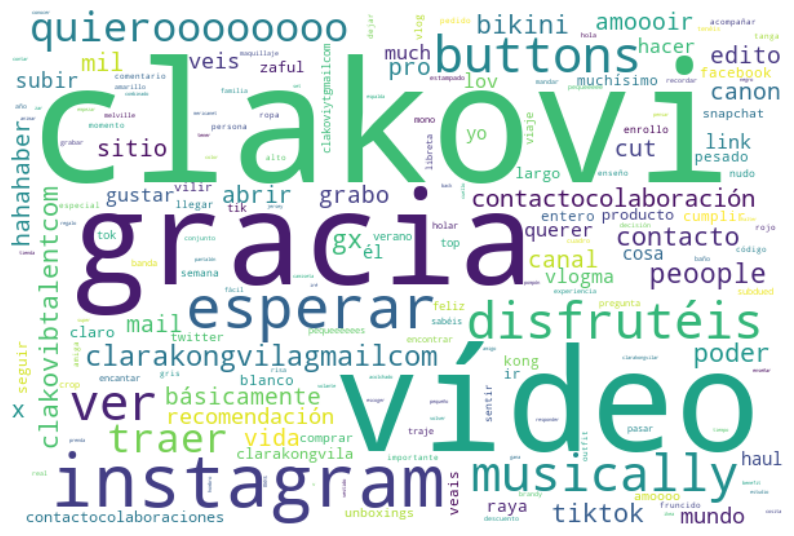

In [11]:

description_words = ' '.join([' '.join(doc) for doc in df['description']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(description_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("description_wordcloud.png")

plt.show()
